Loading the Input Image

1.Input image and the histogram of the input image

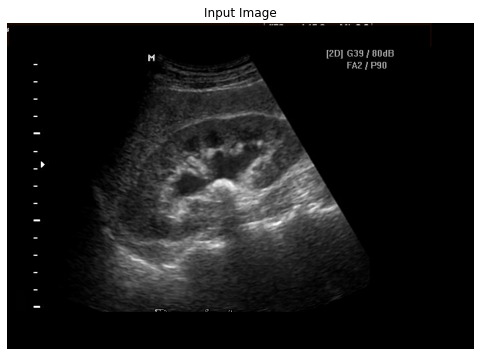

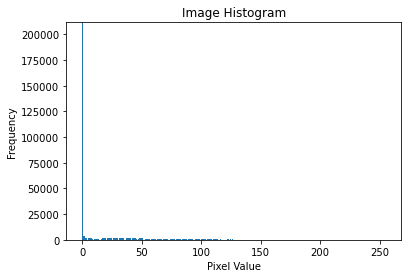

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image = cv2.imread(r"img_path") 
cv2.imshow("Input Image", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

hist = cv2.calcHist([input_image], [0], None, [256], [0, 256])

hist = hist.flatten()

pixel_values = range(256)

plt.figure(figsize=(10, 6))
plt.imshow(input_image)
plt.title('Input Image')
plt.axis('off')
plt.show()

plt.bar(pixel_values, hist)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.ylim(0, max(hist))  
plt.show()



2.Converting to gray scale image and it's histogram

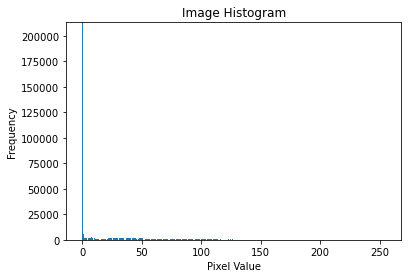

In [2]:
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale Image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("gray.png",gray)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist = hist.flatten()
pixel_values = range(256)

plt.bar(pixel_values, hist)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.ylim(0, max(hist)) 
plt.show()


3.Converting to Gray scale to Binary Image and it's histogram

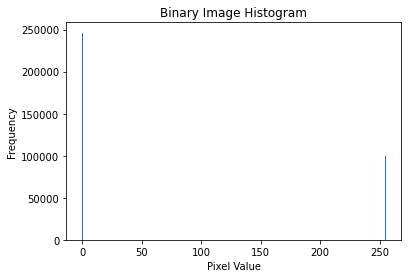

In [3]:
_, binary_image = cv2.threshold(gray , 20,255, cv2.THRESH_BINARY)

cv2.imshow("Binary Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

hist = cv2.calcHist([binary_image], [0], None, [256], [0, 256])
hist = hist.flatten()
pixel_values = np.arange(256)

plt.bar(pixel_values, hist)
plt.title("Binary Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

4.Filling the Holes in Binary Images

In [4]:
_, thresholded_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filled_image = np.zeros_like(binary_image)

cv2.drawContours(filled_image, contours, -1, 255, thickness=cv2.FILLED)

cv2.imshow("Filled Image", filled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


5.Removing the background

In [5]:
contours, _ = cv2.findContours(filled_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

isolated_mask = np.zeros_like(filled_image)

for contour in contours:
    area = cv2.contourArea(contour)

    if area > 800:
        cv2.drawContours(isolated_mask, [contour], 0, 255, cv2.FILLED)

removed_background = cv2.bitwise_and(filled_image, isolated_mask)

cv2.imshow("Removed Background", removed_background)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("removed_background.png",removed_background)

True

6.Overlapping the input image with the resulted image

In [6]:
inp_image = cv2.imread(r"img_path", 0)

removed_background = cv2.resize(removed_background, (inp_image.shape[1], inp_image.shape[0]))

merged_image = cv2.bitwise_and(inp_image, removed_background)

cv2.imshow("Merged Image", merged_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("merged_image.png",merged_image)

True

7.Contrast enhancement of the merged image

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray_image = cv2.imread("merged_image.png", cv2.IMREAD_GRAYSCALE)

contrast_factor = 1.5 
adjusted_image = np.clip(gray_image * contrast_factor,100, 255).astype(np.uint8)

cv2.imshow("Adjusted Image", adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("adjusted_image.png", adjusted_image)

True

8.Application of median filter

In [7]:
enhanced_image = cv2.imread('adjusted_image.png', cv2.IMREAD_GRAYSCALE)

median_filtered_image = cv2.medianBlur(enhanced_image, ksize=9)

cv2.imshow("Filtered Image", median_filtered_image )
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("median_filtered_image.png",median_filtered_image)

True

9.Coverting the filtered image to binary

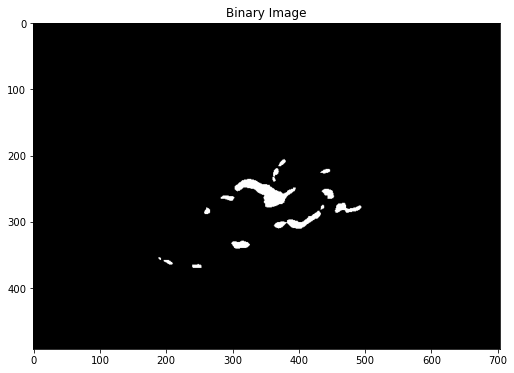

In [9]:
threshold_value = 219 
_, binary_image2 = cv2.threshold(median_filtered_image, threshold_value, 255, cv2.THRESH_BINARY)

cv2.imshow("Binary Image2", binary_image2 )
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("binary_image2.png",binary_image2)

plt.figure(figsize=(10, 6))
plt.imshow(binary_image2, cmap='gray')
plt.title('Binary Image')
plt.show()

10.Selecting the region of interest(Masking)

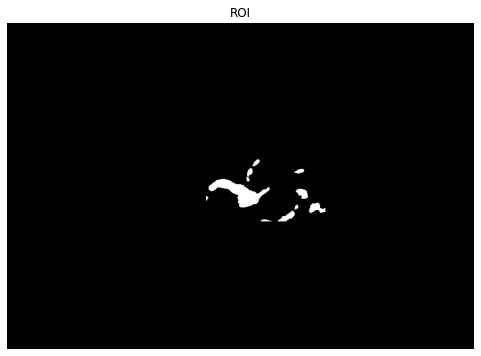

In [10]:
start_x, start_y, end_x, end_y = 300, 200, 480, 300

mask = np.zeros(binary_image2.shape[:2], dtype=np.uint8)
mask[start_y:end_y, start_x:end_x] = 255

roi = cv2.bitwise_and(binary_image2, binary_image2, mask=mask)

cv2.imshow('ROI', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("roi.png",roi)

plt.figure(figsize=(10, 6))
plt.imshow(roi,cmap='gray')
plt.title('ROI')
plt.axis('off')
plt.show()

11.Merging the roi and input

In [11]:
import cv2
import numpy as np

binary_image = cv2.imread('roi.png', cv2.IMREAD_GRAYSCALE)

gray_image = cv2.imread(r"img_path", cv2.IMREAD_GRAYSCALE)

_, binary_mask = cv2.threshold(binary_image, 0, 255, cv2.THRESH_BINARY)

m_image = cv2.bitwise_and(gray_image, gray_image, mask=binary_mask)

cv2.imshow('Merged Image', m_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('m_image.png',m_image)



True

12.Applying Morphological operations

In [12]:
import cv2
import numpy as np

m_image = cv2.imread('m_image.png', cv2.IMREAD_COLOR)

if m_image is None:
    print('Error: Failed to load the image')
    exit()

gray_image = cv2.cvtColor(m_image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.uint8)
opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

cv2.imshow('Original Merged Image', m_image)
cv2.imshow('Opened Image', opened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('opened_image.png', opened_image)

True

13.Denoising the resulted image

In [13]:
import cv2
import numpy as np

processed_image = cv2.imread('opened_image.png', cv2.IMREAD_GRAYSCALE)

denoised_image = cv2.medianBlur(processed_image, 5) 
cv2.imshow('Denoised Image', denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('denoised_image.png', denoised_image)

True

14.Applying the threshold value to differentiate

In [14]:
import cv2
import numpy as np

image = cv2.imread('denoised_image.png', cv2.IMREAD_GRAYSCALE)

threshold_value = 205

_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

cv2.imshow('Original Image', image)
cv2.imshow('Thresholded Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('thresholded_image.png', thresholded_image)

True